In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
from scipy.stats import t

In [9]:
from scipy.stats import norm

In [10]:
#Functions we will use in the later part
def std(l):
    m = sum(l)/len(l)
    s = 0
    for i in l:
        s = s + (i-m)**2
    s = s/(len(l)-1)
    return (s**0.5)
def t_score(X,u,S,n):
    return (X-u)/(S/(n**0.5))

 # Question 1
 
 Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?
 
 ## Step-1 
 
 **Bold claim**: A packet of biryani does not weigh 500g \
 $ H_1 : \mu \neq $ 500 \ 
 
 **Status quo**: Packet of biryani weighs 500g \
 $ H_0 : \mu = $ 500
 
 ## Step-2
 
 We collect a sample. Here, we collected a sample of size 10 with values [ 490, 220, 470, 500, 495, 496, 496, 498, 508, 480] and compute the mean is this sample.

In [11]:
sample = [ 490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
mu = 500
n=10
mean = sum(sample)/n
print('mean :',mean)

mean : 465.3


We get the sample mean, $ \bar{x} $ = 465.3.

## Step - 3

Computing the test statistic

t_score = $ \frac{\bar{x}-\mu}{S\sqrt{n}} $ where S is the sample standard deviation

In [12]:
Std_dev = std(sample)
print("Standard deviation :",Std_dev)

Standard deviation : 86.84859110991827


In [13]:
t_sc = t_score(mean,mu,Std_dev,n)
print('t score :',abs(t_sc))

t score : 1.2634751284446715


# Step - 4

 We use the confidence levels. 
 $ \alpha $ = 1 - confidence level

In [14]:
confidence_level = 0.95
alpha = 1 - confidence_level

Now, our test is two tailed. Hence our rejection area is $ \frac{\alpha}{2} $ % of the total area on both ends of the distribution. Hence we need to find the value t_critical $ t_{9,\frac{\alpha}{2}} $. Here 9 is the degrees of freedom which is equal to n-1.

## Step-5

### Step 5.1

If |t_score| > |t_critical| : We reject $ H_0 $ and accept $ H_1 $. 
Else, we reject $ H_1 $ and fail to reject $ H_0 $.\

### Step 5.2

If the p value is greater than $ \ alpha $, we fail to reject $ H_0 $.\
p value = 2*(1-cdf(|t score|)) for two tailed test where cdf is the cumulative distribution function.

In [15]:
t_critical = abs(t.ppf(alpha/2, df = 9))
print(t_critical)

2.2621571627409915


In [16]:
if abs(t_sc) > abs(t_critical):
    print('We reject H0')
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [45]:
p_value = 2 * (1.0 - t.cdf(abs(t_sc),df = 9))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.23816470585327654
Fail to reject Null Hypothesis


**Hence we fail to reject $ H_0 $ and we conclude that a packet of biryani from Pista House does indeed have 500g** 

Text(465.3, 0, 'x_bar')

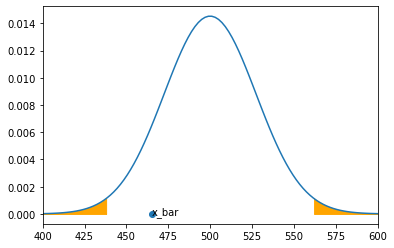

In [46]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600

sam_std = Std_dev/(10**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x , mu, sam_std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = mu + (-t_critical * sam_std)
t_critical_right = mu + (t_critical * sam_std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1 , mu, sam_std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2 , mu, sam_std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(mean, 0)
plt.annotate("x_bar", (mean, 0))

The graph above illustrates our result

# Question 2

Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

 ## Step-1 
 
 **Bold claim**: Average rating is greater than 4 \
 $ H_1 : \mu  $ > 4 , $ \mu $ is the population mean
 
 **Status quo**: Average rating is less than or equal to 4 \
 $ H_0 : \mu \leq $  4
 
 ## Step-2
 
 We collect a sample. Here, we collected a sample of size 20 with values [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5] and compute the mean is this sample.

In [19]:
sample2 = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
mean2 = sum(sample2)/20
print('Mean of the sample is :',mean2)

Mean of the sample is : 4.25


We get the sample mean, $ \bar{x} $ = 4.25.

## Step - 3

Computing the test statistic

t_score = $ \frac{\bar{x}-\mu}{S\sqrt{n}} $ where S is the sample standard deviation

In [20]:
mu2 = 4
n2 = 20
Std_dev2 = std(sample2)
t_sc2 = t_score(mean2,mu2,Std_dev2,n2)
print('t score :',abs(t_sc2))

t score : 1.3142574813455419


# Step - 4

 We use the confidence levels. 
 $ \alpha $ = 1 - confidence level

In [21]:
confidence_level = 0.95
alpha = 1 - confidence_level

Now, our test is right tailed.Hence our rejection area is $ \alpha $ % of the total area on the right end of the distribution.

## Step-5

### Step 5.1

If t_score > t_critical : We reject $ H_0 $ and accept $ H_1 $. \
Else, we reject $ H_1 $ and fail to reject $ H_0 $.

### Step 5.2

If the p value is greater than $ \ alpha $, we fail to reject $ H_0 $.\
p value = (1-cdf(t score)) for two tailed test where cdf is the cumulative distribution function.

In [22]:
t_critical2 = abs(t.ppf(alpha, df = 19))
print(t_critical2)

1.729132811521367


In [23]:
if abs(t_sc2) > abs(t_critical2):
    print('We reject H0')
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [24]:
p_value2 = (1.0 - t.cdf(abs(t_sc2),df = 19))

print("p_value = ", p_value)

if(p_value2 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.23816470585327654
Fail to reject Null Hypothesis


The value of t score was found to be less than the t_critical value. Hence we fail to reject $ H_0 $. This is consistent with the p value test as well.

Text(4.25, 0.1, 'x_bar')

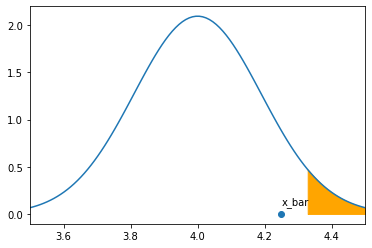

In [25]:
 # Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std

samp_std2 = Std_dev2/(20**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mu2 , samp_std2)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right2 = mu2 + (t_critical2 * samp_std2)


# Shading the right rejection region
x1 = np.linspace(t_critical_right2, x_max, 100)
y1 = norm.pdf(x1, mu2, samp_std2)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(mean2, 0)
plt.annotate("x_bar", (mean2, 0.1))

Hence, the average rating is less than 4

# Question 3

Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

 ## Step-1 
 
 **Bold claim**: SUVs mileage is at least 15kms \
 $ H_1 : \mu  $ > 15 , $ \mu $ is the population mean
 
 **Status quo**: SUVs mileage is at least 15kms \
 $ H_0 : \mu \leq $  15
 
 ## Step-2
 
 We collect a sample. Here, we collected a sample of size 20 with values [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38] and compute the mean is this sample.

In [26]:
sample3 = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
n3 = len(sample3)
mean3 = sum(sample3)/n3
print('The mean is :',mean3)

The mean is : 15.098999999999998


We get the sample mean, $ \bar{x} $ = 15.1

## Step - 3

Computing the test statistic

t_score = $ \frac{\bar{x}-\mu}{S\sqrt{n}} $ where S is the sample standard deviation

In [27]:
mu3 = 15
n3 = 20
Std_dev3 = std(sample3)
t_sc3 = t_score(mean3,mu3,Std_dev3,n3)
print('t score :',abs(t_sc3))

t score : 0.4317882018907916


# Step - 4

 We use the confidence levels. 
 $ \alpha $ = 1 - confidence level

In [28]:
confidence_level = 0.95
alpha = 1 - confidence_level

Now, our test is right tailed.Hence our rejection area is $ \alpha $ % of the total area on the right end of the distribution.

## Step-5

### Step 5.1

If t_score > t_critical : We reject $ H_0 $ and accept $ H_1 $. \
Else, we reject $ H_1 $ and fail to reject $ H_0 $.

### Step 5.2

If the p value is greater than $ \ alpha $, we fail to reject $ H_0 $.\
p value = (1-cdf(t score)) for two tailed test where cdf is the cumulative distribution function.

In [29]:
t_critical3 = abs(t.ppf(alpha, df = 19))
print(t_critical3)

1.729132811521367


In [30]:
if abs(t_sc3) > abs(t_critical3):
    print('We reject H0')
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [42]:
p_value3 = (1.0 - t.cdf(abs(t_sc3),df = 19))

print("p_value = ", p_value)

if(p_value3 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.23816470585327654
Fail to reject Null Hypothesis


The value of t score was found to be less than the t_critical value. Hence we fail to reject $ H_0 $. This is consistent with the p value test as well.

Text(15.098999999999998, 0.1, 'x_bar')

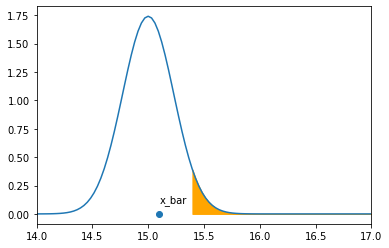

In [32]:
# Defining the x minimum and x maximum
x_min = 14
x_max = 17


# Defining the sampling distribution mean and sampling distribution std

samp_std3 = Std_dev3/(20**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mu3 , samp_std3)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right3 = mu3 + (t_critical3 * samp_std3)


# Shading the right rejection region
x1 = np.linspace(t_critical_right3, x_max, 100)
y1 = norm.pdf(x1, mu3, samp_std3)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(mean3, 0)
plt.annotate("x_bar", (mean3, 0.1))

The above figure illustrates the same.

# Question 4

Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

 ## Step-1 
 
 **Bold claim**: Time is less than 100ms \
 $ H_1 : \mu  $ < 100 , $ \mu $ is the population mean
 
 **Status quo**: Time is greater than or equal to 100ms  \
 $ H_0 : \mu \geq $  100
 
 ## Step-2
 
 We collect a sample. Here, we collected a sample of size 100 with values with mean = 97.5 and standard deviation of 7.25.

## Step - 3

Computing the test statistic

t_score = $ \frac{\bar{x}-\mu}{S\sqrt{n}} $ where S is the sample standard deviation

In [49]:
mean4 = 97.5
mu4 = 100
n4 = 100
Std_dev4 = 9.25
t_sc4 = t_score(mean4,mu4,Std_dev4,n4)
print('t score :',t_sc4)

t score : -2.7027027027027026


# Step - 4

 We use the confidence levels. 
 $ \alpha $ = 1 - confidence level

In [50]:
Alpha = 0.01

In [51]:
t_critical4 = t.ppf(Alpha, df = 99)
print(t_critical4)

-2.364605861435974


Now, our test is left tailed.Hence our rejection area is $ \alpha $ % of the total area on the left end of the distribution.

## Step-5

### Step 5.1

If t_score < t_critical : We reject $ H_0 $ and accept $ H_1 $. \
Else, we reject $ H_1 $ and fail to reject $ H_0 $.

### Step 5.2

If the p value is greater than $ \ alpha $, we fail to reject $ H_0 $.\
p value = (1-cdf(t score)) for two tailed test where cdf is the cumulative distribution function.

In [54]:
if abs(t_sc4) > abs(t_critical4):
    print('Reject Null Hypothesis')
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [52]:
p_value4 = 1 - t.cdf(abs(t_sc4),df = 99)

print("p_value = ", p_value)

if(p_value4 < Alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.23816470585327654
Reject Null Hypothesis


Text(97.5, 0, 'x_bar')

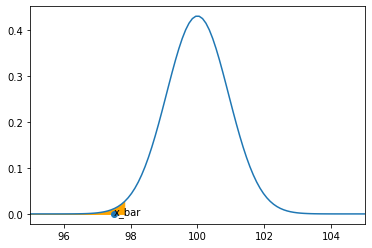

In [58]:
x_min = 95
x_max = 105

samp_std4 = Std_dev4/(100**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mu4, samp_std4)

plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left critical value (Left tailed Test)
t_critical_right4 = mu4 + (t_critical4 * samp_std4)


# Shading the left rejection region
x1 = np.linspace(x_min,t_critical_right4, 100)
y1 = norm.pdf(x1, mu4, samp_std4)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(mean4, 0)
plt.annotate("x_bar", (mean4, 0))

Hence the algorithm takes less than 100ms to predict the result.
The above graph explains our result.